<a href="https://colab.research.google.com/github/CeliJC/CI/blob/main/ci_LogicaDifusa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

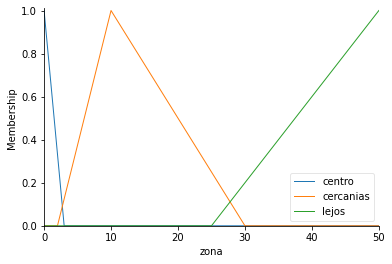

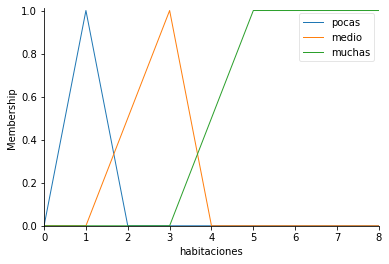

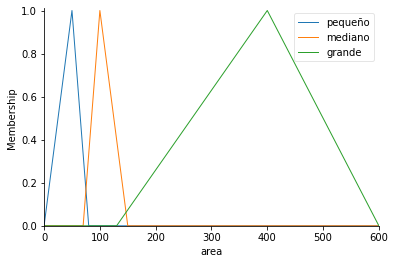

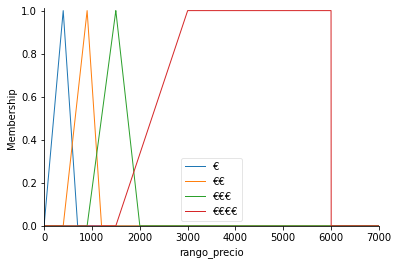

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Estimador de precios según la zona, el número de habitaciones y el area(m2) del piso

zona = ctrl.Antecedent(np.arange(0, 51, 1), 'zona')
habitaciones = ctrl.Antecedent(np.arange(0, 9, 1), 'habitaciones')
area = ctrl.Antecedent(np.arange(0, 601, 1), 'area')

rango_precio = ctrl.Consequent(np.arange(0, 7001, 1), 'rango_precio')


#Km hasta el centro
zona['centro'] = fuzz.trimf(zona.universe, [0, 0, 3])
zona['cercanias'] = fuzz.trimf(zona.universe, [2, 10, 30])
zona['lejos'] = fuzz.trimf(zona.universe, [25, 50, 50])

#Habitaciones
habitaciones['pocas'] = fuzz.trimf(habitaciones.universe, [0, 1, 2])
habitaciones['medio'] = fuzz.trimf(habitaciones.universe, [1, 3, 4])
habitaciones['muchas'] = fuzz.trapmf(habitaciones.universe, [3, 5, 8, 8])

#Area piso m2
area['pequeño'] = fuzz.trimf(area.universe, [0, 50, 80])
area['mediano'] = fuzz.trimf(area.universe, [70, 100, 150])
area['grande'] = fuzz.trimf(area.universe, [130, 400, 600])

rango_precio['€'] = fuzz.trimf(rango_precio.universe, [0, 400, 700])
rango_precio['€€'] = fuzz.trimf(rango_precio.universe, [400, 900, 1200])
rango_precio['€€€'] = fuzz.trimf(rango_precio.universe, [900,1500, 2000])
rango_precio['€€€€'] = fuzz.trapmf(rango_precio.universe, [1500,3000, 6000, 6000])


zona.view()
habitaciones.view()
area.view()
rango_precio.view()

In [ ]:
#RULES
rule1 = ctrl.Rule(habitaciones['muchas']&zona['centro']&area['grande'],rango_precio['€€€€'])
rule2 = ctrl.Rule(habitaciones['muchas']&zona['centro']&area['mediano'],rango_precio['€€€'])
rule3 = ctrl.Rule(habitaciones['muchas']&zona['centro']&area['pequeño'],rango_precio['€€'])
rule4 = ctrl.Rule(habitaciones['muchas']&zona['cercanias']&area['grande'],rango_precio['€€€'])
rule5 = ctrl.Rule(habitaciones['muchas']&zona['cercanias']&area['mediano'],rango_precio['€€€'])
rule6 = ctrl.Rule(habitaciones['muchas']&zona['cercanias']&area['pequeño'],rango_precio['€'])
rule7 = ctrl.Rule(habitaciones['muchas']&zona['lejos']&area['grande'],rango_precio['€€€'])
rule8 = ctrl.Rule(habitaciones['muchas']&zona['lejos']&area['mediano'],rango_precio['€€'])
rule9 = ctrl.Rule(habitaciones['muchas']&zona['lejos']&area['pequeño'],rango_precio['€'])

rule10 = ctrl.Rule(habitaciones['medio']&zona['centro']&area['grande'],rango_precio['€€€€'])
rule11 = ctrl.Rule(habitaciones['medio']&zona['centro']&area['mediano'],rango_precio['€€€'])
rule12 = ctrl.Rule(habitaciones['medio']&zona['centro']&area['pequeño'],rango_precio['€€'])
rule13 = ctrl.Rule(habitaciones['medio']&zona['cercanias']&area['grande'],rango_precio['€€€€'])
rule14 = ctrl.Rule(habitaciones['medio']&zona['cercanias']&area['mediano'],rango_precio['€€'])
rule15 = ctrl.Rule(habitaciones['medio']&zona['cercanias']&area['pequeño'],rango_precio['€€'])
rule16 = ctrl.Rule(habitaciones['medio']&zona['lejos']&area['grande'],rango_precio['€€'])
rule17 = ctrl.Rule(habitaciones['medio']&zona['lejos']&area['mediano'],rango_precio['€€'])
rule18 = ctrl.Rule(habitaciones['medio']&zona['lejos']&area['pequeño'],rango_precio['€'])

rule19 = ctrl.Rule(habitaciones['pocas']&zona['centro']&area['grande'],rango_precio['€€€€'])
rule20 = ctrl.Rule(habitaciones['pocas']&zona['centro']&area['mediano'],rango_precio['€€'])
rule21 = ctrl.Rule(habitaciones['pocas']&zona['centro']&area['pequeño'],rango_precio['€'])
rule22 = ctrl.Rule(habitaciones['pocas']&zona['cercanias']&area['grande'],rango_precio['€€€'])
rule23 = ctrl.Rule(habitaciones['pocas']&zona['cercanias']&area['mediano'],rango_precio['€€'])
rule24 = ctrl.Rule(habitaciones['pocas']&zona['cercanias']&area['pequeño'],rango_precio['€€'])
rule25 = ctrl.Rule(habitaciones['pocas']&zona['lejos']&area['grande'],rango_precio['€€'])
rule26 = ctrl.Rule(habitaciones['pocas']&zona['lejos']&area['mediano'],rango_precio['€'])
rule27 = ctrl.Rule(habitaciones['pocas']&zona['lejos']&area['pequeño'],rango_precio['€'])

rule28 = ctrl.Rule(habitaciones['muchas']&area['grande'],rango_precio['€€€€'])
rule29 = ctrl.Rule(habitaciones['muchas']&area['mediano'],rango_precio['€€'])
rule30 = ctrl.Rule(habitaciones['muchas']&area['pequeño'],rango_precio['€'])
rule31 = ctrl.Rule(habitaciones['muchas'],rango_precio['€€€'])
rule32 = ctrl.Rule(habitaciones['medio']|zona['cercanias']|area['mediano'],rango_precio['€€'])
rule33 = ctrl.Rule(habitaciones['pocas']|zona['lejos']|area['pequeño'],rango_precio['€'])

precio_recomendado_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30,rule31,rule32,rule33])
precio_recomendado = ctrl.ControlSystemSimulation(precio_recomendado_ctrl)

In [ ]:
#Precio de un estudio en el centro
precio_recomendado.input['habitaciones'] = 1 
precio_recomendado.input['zona'] = 2 
precio_recomendado.input['area'] = 40 
precio_recomendado.compute()
print(precio_recomendado.output['rango_precio'])

366.6666666666663


In [ ]:
#Precio piso cercanias 
precio_recomendado.input['habitaciones'] = 3 
precio_recomendado.input['zona'] = 10 
precio_recomendado.input['area'] = 100
precio_recomendado.compute()
print(precio_recomendado.output['rango_precio'])

833.3333333333345


Al aumentar el número de habitaciones el precio aumenta ligeramente puesto que el area es la misma

In [ ]:
precio_recomendado.input['habitaciones'] = 3 
precio_recomendado.input['zona'] = 2 
precio_recomendado.input['area'] = 100 
precio_recomendado.compute()
print(precio_recomendado.output['rango_precio'])

1106.5913370998032


In [ ]:
precio_recomendado.input['habitaciones'] = 5 
precio_recomendado.input['zona'] = 2 
precio_recomendado.input['area'] = 100
precio_recomendado.compute()
print(precio_recomendado.output['rango_precio'])


1207.4074074074094


Vemos como al alejarnos del centro el precio es más barato

In [ ]:
precio_recomendado.input['habitaciones'] = 3 
precio_recomendado.input['zona'] = 2 
precio_recomendado.input['area'] = 100 
precio_recomendado.compute()
print(precio_recomendado.output['rango_precio'])

1106.5913370998032


In [ ]:
precio_recomendado.input['habitaciones'] = 3 
precio_recomendado.input['zona'] = 25 
precio_recomendado.input['area'] = 100 
precio_recomendado.compute()
print(precio_recomendado.output['rango_precio'])

833.3333333333345


In [ ]:

precio_recomendado.input['habitaciones'] = 3 
precio_recomendado.input['zona'] = 50 
precio_recomendado.input['area'] = 100 
precio_recomendado.compute()
print(precio_recomendado.output['rango_precio'])

619.8573262632307


In [ ]:
#Piso muy grande centrico
precio_recomendado.input['habitaciones'] = 7 
precio_recomendado.input['zona'] = 2
precio_recomendado.input['area'] = 300
precio_recomendado.compute()
print(precio_recomendado.output['rango_precio'])

3565.774256693527


In [ ]:
#Piso pequeño/medio lejos
precio_recomendado.input['habitaciones'] = 2 
precio_recomendado.input['zona'] = 50
precio_recomendado.input['area'] = 70
precio_recomendado.compute()
print(precio_recomendado.output['rango_precio'])

578.2894840258429
